# Introduction to Neural Networks using Keras (TensorFlow)

## Implementing MLPs with Keras

### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in tf.keras.datasets. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [1]:
import tensorflow as tf


fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('uint8')

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

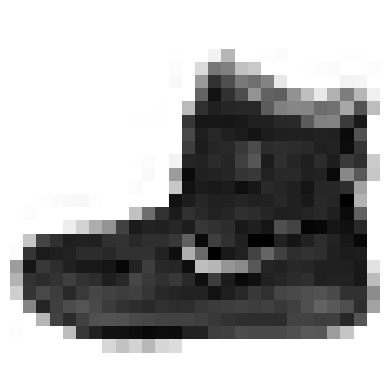

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

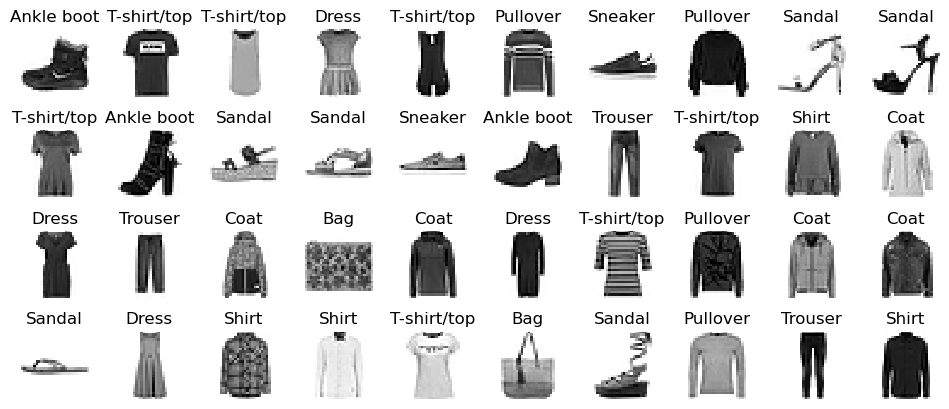

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the model using the Sequential API

In [10]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [17]:
weights

array([[ 0.0300439 ,  0.02641465, -0.01106086, ..., -0.02739182,
         0.06862098, -0.0134642 ],
       [-0.02569454, -0.04317713, -0.01321137, ...,  0.04136789,
         0.01561955,  0.04145502],
       [-0.01194229, -0.02645191,  0.01730262, ...,  0.0110783 ,
        -0.01533008, -0.0232291 ],
       ...,
       [ 0.07246727,  0.05809851,  0.07053582, ..., -0.03587758,
        -0.02747276, -0.01397683],
       [ 0.02178995,  0.05499038, -0.01481121, ..., -0.07036342,
         0.0258465 ,  0.03157853],
       [-0.0184437 ,  0.01351868, -0.00497296, ...,  0.04712845,
        -0.04497935,  0.06673481]], dtype=float32)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

### Compiling the model

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 0.6994 - accuracy: 0.7724 - val_loss: 0.4986 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4835 - accuracy: 0.8326 - val_loss: 0.4606 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8460 - val_loss: 0.4193 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4154 - accuracy: 0.8538 - val_loss: 0.3969 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8608 - val_loss: 0.3913 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8661 - val_loss: 0.3890 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3659 - accuracy: 0.8704 - val_loss: 0.3698 - val_accurac

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


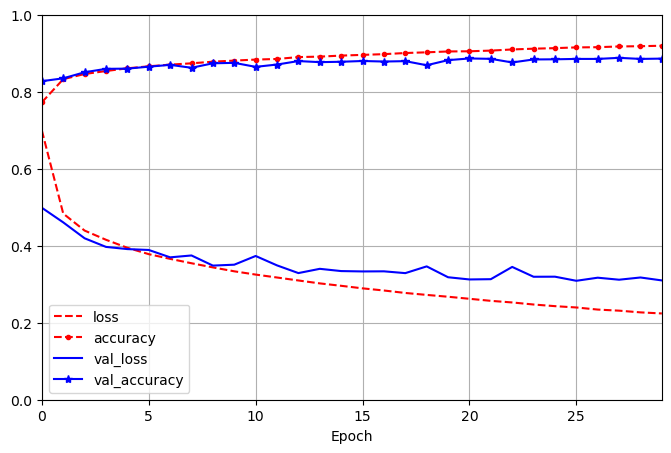

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8848


[0.3257443606853485, 0.8848000168800354]

### Using the model to make predictions

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [34]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

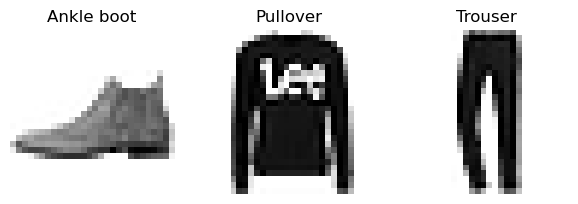

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):



In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [40]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8270 - root_mean_squared_error: 0.9094 - val_loss: 0.3885 - val_root_mean_squared_error: 0.6233
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3774 - root_mean_squared_error: 0.6143 - val_loss: 2.6845 - val_root_mean_squared_error: 1.6385
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3763 - root_mean_squared_error: 0.6135 - val_loss: 0.3411 - val_root_mean_squared_error: 0.5841
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3466 - root_mean_squared_error: 0.5887 - val_loss: 0.6075 - val_root_mean_squared_error: 0.7794
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3298 - root_mean_squared_error: 0.5743 - val_loss: 0.4595 - val_root_mean_squared_error: 0.6778
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3183 - root_mean_squared_error: 0.5642 - val_loss: 0.2967 - val_

In [41]:
rmse_test

0.537241518497467

In [42]:
y_pred

array([[0.5912714],
       [1.1335881],
       [5.1389704]], dtype=float32)